Import Package

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

Create Data

In [2]:
df = pd.DataFrame({"Detergent":np.repeat(["X","Y"],15),
                   "TemperatureLevel":np.tile(np.repeat(["cold","warm","hot"],5),2),
                   "WaterTemperature":[4,5,5,6,5,7,8,9,12,3,10,11,12,19,15,4,4,6,6,5,12,12,13,15,13,10,12,13,13,12]})
print(df)

   Detergent TemperatureLevel  WaterTemperature
0          X             cold                 4
1          X             cold                 5
2          X             cold                 5
3          X             cold                 6
4          X             cold                 5
5          X             warm                 7
6          X             warm                 8
7          X             warm                 9
8          X             warm                12
9          X             warm                 3
10         X              hot                10
11         X              hot                11
12         X              hot                12
13         X              hot                19
14         X              hot                15
15         Y             cold                 4
16         Y             cold                 4
17         Y             cold                 6
18         Y             cold                 6
19         Y             cold           

Two-Way ANOVA

In [3]:
print("="*32+"TwoWay ANOVA"+"="*32)
model = ols('WaterTemperature ~ C(Detergent) + C(TemperatureLevel) + C(Detergent):C(TemperatureLevel)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))
print("\n"+"="*17+"Analysis of Variance for Water Temperature"+"="*17)
print(sm.stats.anova_lm(model, typ=1))
print("\n"+"="*32+"Model  Summary"+"="*32)
print(model.summary())

================================TwoWay ANOVA================================
                                      sum_sq    df          F        PR(>F)
C(Detergent)                       12.033333   1.0   2.533333  1.245517e-01
C(TemperatureLevel)               312.466667   2.0  32.891228  1.331181e-07
C(Detergent):C(TemperatureLevel)   60.466667   2.0   6.364912  6.057712e-03
Residual                          114.000000  24.0        NaN           NaN

=================Analysis of Variance for Water Temperature=================
                                    df      sum_sq     mean_sq          F  \
C(Detergent)                       1.0   12.033333   12.033333   2.533333   
C(TemperatureLevel)                2.0  312.466667  156.233333  32.891228   
C(Detergent):C(TemperatureLevel)   2.0   60.466667   30.233333   6.364912   
Residual                          24.0  114.000000    4.750000        NaN   

                                        PR(>F)  
C(Detergent)                  

Create list of residuals, list of sorted residuals, list of accumulated percent for sorted residuals, and list of observation order

In [4]:
residuals = model.resid
residuals_list = residuals.tolist()
residuals_list_sorted = sorted(residuals_list)
percent_list = []
observation_order_list = []
for i in range(1,31):
    percent = 100/30*i
    percent_list.append(percent)
for i in range(1,31):
    observation_order_list.append(i)

Plot the Normal Probability Plot

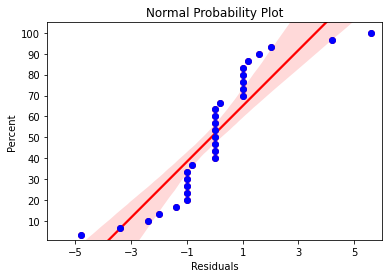

In [5]:
sns.regplot(x=residuals_list_sorted, y=percent_list, color='r')
plt.plot(residuals_list_sorted, percent_list, 'o', color='b')
plt.title('Normal Probability Plot')
plt.xlabel('Residuals')
plt.ylabel('Percent')
plt.xticks(range(-5,7,2))
plt.yticks(range(0,110,10))
plt.axis((-6,6,1,105))
plt.show()

Plot the Versus Fit

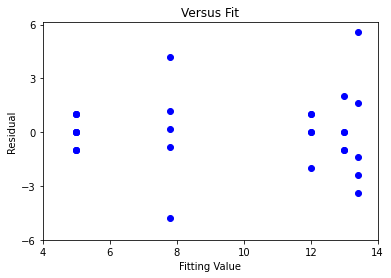

In [6]:
plt.plot(model.fittedvalues,model.resid, color='b', marker='o', linestyle="None")
plt.title('Versus Fit')
plt.xlabel('Fitting Value')
plt.ylabel('Residual')
plt.xticks(range(4,15,2))
plt.yticks(range(-6,8,3))
plt.show()

Plot the Histogram

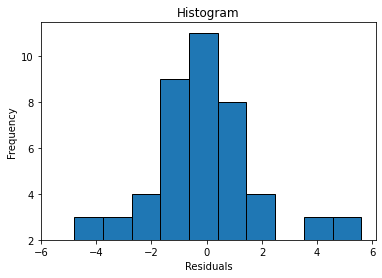

In [7]:
plt.hist(residuals_list, bins=10, histtype='bar', ec='k', bottom=2)
plt.title('Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xticks(range(-6,8,2))
plt.show()

Plot the Versus Order

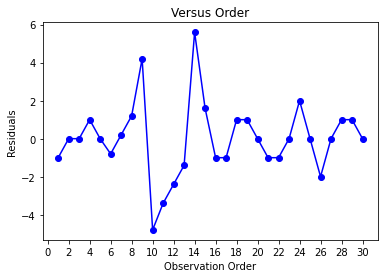

In [8]:
plt.plot(observation_order_list,residuals_list,'o-',color = 'b')
plt.title('Versus Order')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.xticks(range(0,31,2))
plt.show()